<a href="https://colab.research.google.com/github/abhi12ravi/object-detection/blob/main/yolo_object_detection_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Object detection using YOLO v3 pre-trained model for custom training

# Installation

In [2]:
pip install tensorflow==2.4.0

     |████████████████████████████████| 394.7 MB 19 kB/s 
     |████████████████████████████████| 462 kB 47.1 MB/s 
     |████████████████████████████████| 2.9 MB 34.0 MB/s 
     |████████████████████████████████| 14.8 MB 25.6 MB/s 
     |████████████████████████████████| 3.8 MB 34.1 MB/s 
     |████████████████████████████████| 132 kB 45.2 MB/s 
  Created wheel for wrapt: filename=wrapt-1.12.1-cp37-cp37m-linux_x86_64.whl size=68719 sha256=899e8c80a54a2d47825792e72450d28e9e3914959016e65658856b7d977e7ad0
  Stored in directory: /root/.cache/pip/wheels/62/76/4c/aa25851149f3f6d9785f6c869387ad82b3fd37582fa8147ac6
Successfully built wrapt
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
  A

In [3]:
pip install keras==2.4.3 numpy==1.19.3 pillow==7.0.0 scipy==1.4.1 h5py==2.10.0 matplotlib==3.3.2 opencv-python keras-resnet==0.2.0

     |████████████████████████████████| 14.9 MB 7.9 MB/s 
     |████████████████████████████████| 2.1 MB 34.1 MB/s 
     |████████████████████████████████| 11.6 MB 23.6 MB/s 
  Created wheel for keras-resnet: filename=keras_resnet-0.2.0-py2.py3-none-any.whl size=20486 sha256=263818bc8a7b448f9fcecb04fd625b63cc130dd44b43591e30b0267b48bc785e
  Stored in directory: /root/.cache/pip/wheels/bd/ef/06/5d65f696360436c3a423020c4b7fd8c558c09ef264a0e6c575
Successfully built keras-resnet
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: matplotlib
    Found existing installation: m

In [4]:
!pip install imageai --upgrade

     |████████████████████████████████| 160 kB 5.2 MB/s 


# Model Training

In [ ]:
#Get the pretrained model

from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()

In [ ]:
trainer.setDataDirectory(data_directory="/content/drive/MyDrive/Colab Notebooks/data")

In [ ]:
trainer.setTrainConfig(object_names_array=["person", "car"], batch_size=4, num_experiments=10, train_from_pretrained_model="/content/drive/MyDrive/Colab Notebooks/model/pretrained-yolov3.h5")

Generating anchor boxes for training images and annotation...
Average IOU for 9 anchors: 0.61
Anchor Boxes generated.
Detection configuration saved in  /content/drive/MyDrive/Colab Notebooks/data/json/detection_config.json


In [ ]:
trainer.trainModel()

Evaluating over 447 samples taken from /content/drive/MyDrive/Colab Notebooks/data/validation
Training over 1792 samples  given at /content/drive/MyDrive/Colab Notebooks/data/train
Training on: 	['car', 'person']
Training with Batch Size:  4
Number of Training Samples:  1792
Number of Validation Samples:  447
Number of Experiments:  10
Training with transfer learning from pretrained Model


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


Epoch 1/10
3584/3584 [==============================] - 3839s 1s/step - loss: 55.1880 - yolo_layer_loss: 7.5722 - yolo_layer_1_loss: 15.0141 - yolo_layer_2_loss: 23.0871 - val_loss: 40.2367 - val_yolo_layer_loss: 6.0273 - val_yolo_layer_1_loss: 12.0688 - val_yolo_layer_2_loss: 17.2368
Epoch 2/10
1346/3584 [==========>...................] - ETA: 35:17 - loss: 41.4175 - yolo_layer_loss: 5.8708 - yolo_layer_1_loss: 12.4768 - yolo_layer_2_loss: 18.3623

# Evaluating the models generated


In [5]:
from imageai.Detection.Custom import DetectionModelTrainer

trainer = DetectionModelTrainer()
trainer.setModelTypeAsYOLOv3()
trainer.setDataDirectory(data_directory="/content/drive/MyDrive/Colab Notebooks/data")

trainer.evaluateModel(model_path="/content/drive/MyDrive/Colab Notebooks/data/models", json_path="/content/drive/MyDrive/Colab Notebooks/data/json/detection_config.json", iou_threshold=0.5, object_threshold=0.3, nms_threshold=0.5)

Starting Model evaluation....
Evaluating over 447 samples taken from /content/drive/MyDrive/Colab Notebooks/data/validation
Training over 1792 samples  given at /content/drive/MyDrive/Colab Notebooks/data/train
Model File:  /content/drive/MyDrive/Colab Notebooks/data/models/detection_model-ex-001--loss-0047.426.h5 

Evaluation samples:  447
Using IoU:  0.5
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
car: 0.0057
person: 0.0029
mAP: 0.0043
Model File:  /content/drive/MyDrive/Colab Notebooks/data/models/detection_model-ex-001--loss-0047.435.h5 

Evaluation samples:  447
Using IoU:  0.5
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
car: 0.0072
person: 0.0009
mAP: 0.0041
Model File:  /content/drive/MyDrive/Colab Notebooks/data/models/detection_model-ex-002--loss-0040.103.h5 

Evaluation samples:  447
Using IoU:  0.5
Using Object Threshold:  0.3
Using Non-Maximum Suppression:  0.5
car: 0.0193
person: 0.0057
mAP: 0.0125
Model File:  /content/drive/MyDri

[{'average_precision': {'car': 0.005730467929726904,
   'person': 0.0029332065616227967},
  'evaluation_samples': 447,
  'map': 0.00433183724567485,
  'model_file': '/content/drive/MyDrive/Colab Notebooks/data/models/detection_model-ex-001--loss-0047.426.h5',
  'using_iou': 0.5,
  'using_non_maximum_suppression': 0.5,
  'using_object_threshold': 0.3},
 {'average_precision': {'car': 0.007187077900453635,
   'person': 0.0009362556328352452},
  'evaluation_samples': 447,
  'map': 0.00406166676664444,
  'model_file': '/content/drive/MyDrive/Colab Notebooks/data/models/detection_model-ex-001--loss-0047.435.h5',
  'using_iou': 0.5,
  'using_non_maximum_suppression': 0.5,
  'using_object_threshold': 0.3},
 {'average_precision': {'car': 0.019273001178517553,
   'person': 0.005730336367763303},
  'evaluation_samples': 447,
  'map': 0.012501668773140427,
  'model_file': '/content/drive/MyDrive/Colab Notebooks/data/models/detection_model-ex-002--loss-0040.103.h5',
  'using_iou': 0.5,
  'using_non

# Custom object detection

In [6]:
from imageai.Detection.Custom import CustomObjectDetection

detector = CustomObjectDetection()
detector.setModelTypeAsYOLOv3()
detector.setModelPath("/content/drive/MyDrive/Colab Notebooks/data/models/detection_model-ex-003--loss-0037.995.h5") 
detector.setJsonPath("/content/drive/MyDrive/Colab Notebooks/data/json/detection_config.json")

input_image_path = "/content/drive/MyDrive/Colab Notebooks/data/trainval/images/image_000000001.jpg"
output_image_path = '/content/drive/MyDrive/Colab Notebooks/data/yolo_image_000000001.jpg'

detector.loadModel()
detections = detector.detectObjectsFromImage(input_image=input_image_path, output_image_path=output_image_path)
for detection in detections:
    print(detection["name"], " : ", detection["percentage_probability"], " : ", detection["box_points"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:3504: UserWarning: Even though the tf.config.experimental_run_functions_eagerly option is set, this option does not apply to tf.data functions. tf.data functions are still traced and executed as graphs.
  "Even though the tf.config.experimental_run_functions_eagerly "


car  :  54.64347004890442  :  [15, 17, 529, 287]
car  :  67.77476072311401  :  [630, 0, 1008, 288]


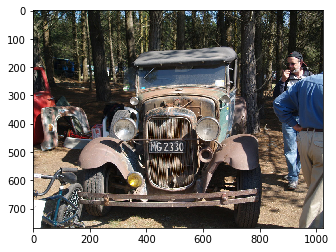

In [3]:
#image_000000001.jpg

input_image_path = "/content/drive/MyDrive/Colab Notebooks/data/trainval/images/image_000000001.jpg"
output_image_path = '/content/drive/MyDrive/Colab Notebooks/data/yolo_image_000000001.jpg'

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(input_image_path)
imgplot = plt.imshow(img)
plt.show()

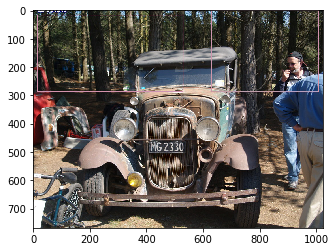

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread(output_image_path)
imgplot = plt.imshow(img)
plt.show()